In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv('mental_health_dataset.csv',encoding= 'unicode_escape')

In [3]:
df.head

<bound method NDFrame.head of        Unnamed: 0                                        Description  \
0               0  I'm sorry about this post. It's gonna be a who...   
1               1  Been getting super high off high amounts of th...   
2               2  My brothers been shooting heroin/meth for the ...   
3               3  I rlly need an opinion cuz idk bout this stuff...   
4               4  Ive smoked weed since 8th grade in middle scho...   
...           ...                                                ...   
11736       11736  possible have satpathy ask question the questi...   
11737       11737                              god that was thorough   
11738       11738                      thread and meat kaun jat bhai   
11739       11739     not touch food with your left hand left handed   
11740       11740                     they say because they care for   

      Mental_State  
0        Addiction  
1        Addiction  
2        Addiction  
3        Addiction  


In [4]:
df.groupby("Mental_State").describe()

Unnamed: 0                                     \
                            count          mean         std      min   
Mental_State                                                           
Addiction                   998.0    498.500000  288.242086      0.0   
Alcoholism                  999.0   1497.000000  288.530761    998.0   
Anxiety                    1024.0   2508.500000  295.747640   1997.0   
Aspergers                   799.0   3516.000000  230.795725   3117.0   
Bipolar                    1024.0   4427.500000  295.747640   3916.0   
Borderline Personality     1024.0   5720.500000  295.747640   5209.0   
Depression                 1024.0   7018.500000  295.747640   6507.0   
Schizophernia              1024.0   8149.500000  295.747640   7638.0   
SelfHarm                    746.0   9144.857909  215.894415   8772.0   
Suidal Thought             1024.0  10030.500000  295.747640   9519.0   
neutral                    1024.0  11228.500000  295.747640  10717.0   

                                                              
                             25%      50%       75%      max  
Mental_State                                                  
Addiction                 249.25    498.5    747.75    997.0  
Alcoholism               1247.50   1497.0   1746.50   1996.0  
Anxiety                  2252.75   2508.5   2764.25   3020.0  
Aspergers                3316.50   3516.0   3715.50   3915.0  
Bipolar                  4171.75   4427.5   4683.25   4939.0  
Borderline Personality   5464.75   5720.5   5976.25   6232.0  
Depression               6762.75   7018.5   7274.25   7530.0  
Schizophernia            7893.75   8149.5   8405.25   8661.0  
SelfHarm                 8958.25   9144.5   9331.75   9518.0  
Suidal Thought           9774.75  10030.5  10286.25  10542.0  
neutral                 10972.75  11228.5  11484.25  11740.0

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelBinarizer

In [6]:
count_vect = CountVectorizer() # for converting text into count-based vectors
tfidf_transformer = TfidfTransformer() # for converting text into tf-idf-based vectors
lb = LabelBinarizer() # object for making class-labels into binary numbers

In [7]:
df.columns

Index(['Unnamed: 0', 'Description', 'Mental_State'], dtype='object')

In [8]:
df.head

<bound method NDFrame.head of        Unnamed: 0                                        Description  \
0               0  I'm sorry about this post. It's gonna be a who...   
1               1  Been getting super high off high amounts of th...   
2               2  My brothers been shooting heroin/meth for the ...   
3               3  I rlly need an opinion cuz idk bout this stuff...   
4               4  Ive smoked weed since 8th grade in middle scho...   
...           ...                                                ...   
11736       11736  possible have satpathy ask question the questi...   
11737       11737                              god that was thorough   
11738       11738                      thread and meat kaun jat bhai   
11739       11739     not touch food with your left hand left handed   
11740       11740                     they say because they care for   

      Mental_State  
0        Addiction  
1        Addiction  
2        Addiction  
3        Addiction  


In [9]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["Mental_State_label"] = lb_make.fit_transform(df["Mental_State"])
df[["Mental_State", "Mental_State_label"]].head(11)



,Mental_State,Mental_State_label
0,Addiction,0
1,Addiction,0
2,Addiction,0
3,Addiction,0
4,Addiction,0
5,Addiction,0
6,Addiction,0
7,Addiction,0
8,Addiction,0
9,Addiction,0


In [10]:
df

,Unnamed: 0,Description,Mental_State,Mental_State_label
0,0,I'm sorry about this post. It's gonna be a who...,Addiction,0
1,1,Been getting super high off high amounts of th...,Addiction,0
2,2,My brothers been shooting heroin/meth for the ...,Addiction,0
3,3,I rlly need an opinion cuz idk bout this stuff...,Addiction,0
4,4,Ive smoked weed since 8th grade in middle scho...,Addiction,0
...,...,...,...,...
11736,11736,possible have satpathy ask question the questi...,neutral,10
11737,11737,god that was thorough,neutral,10
11738,11738,thread and meat kaun jat bhai,neutral,10
11739,11739,not touch food with your left hand left handed,neutral,10


In [11]:
df.isnull()

,Unnamed: 0,Description,Mental_State,Mental_State_label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
11736,False,False,False,False
11737,False,False,False,False
11738,False,False,False,False
11739,False,False,False,False


In [12]:
df.dropna(inplace=True)

In [13]:
df

,Unnamed: 0,Description,Mental_State,Mental_State_label
0,0,I'm sorry about this post. It's gonna be a who...,Addiction,0
1,1,Been getting super high off high amounts of th...,Addiction,0
2,2,My brothers been shooting heroin/meth for the ...,Addiction,0
3,3,I rlly need an opinion cuz idk bout this stuff...,Addiction,0
4,4,Ive smoked weed since 8th grade in middle scho...,Addiction,0
...,...,...,...,...
11736,11736,possible have satpathy ask question the questi...,neutral,10
11737,11737,god that was thorough,neutral,10
11738,11738,thread and meat kaun jat bhai,neutral,10
11739,11739,not touch food with your left hand left handed,neutral,10


In [14]:
text = df['Description'].values.tolist()

In [15]:
df.groupby("Mental_State").describe()

Unnamed: 0                                     \
                            count          mean         std      min   
Mental_State                                                           
Addiction                   998.0    498.500000  288.242086      0.0   
Alcoholism                  999.0   1497.000000  288.530761    998.0   
Anxiety                    1024.0   2508.500000  295.747640   1997.0   
Aspergers                   799.0   3516.000000  230.795725   3117.0   
Bipolar                    1024.0   4427.500000  295.747640   3916.0   
Borderline Personality     1024.0   5720.500000  295.747640   5209.0   
Depression                 1024.0   7018.500000  295.747640   6507.0   
Schizophernia              1024.0   8149.500000  295.747640   7638.0   
SelfHarm                    746.0   9144.857909  215.894415   8772.0   
Suidal Thought             1024.0  10030.500000  295.747640   9519.0   
neutral                    1024.0  11228.500000  295.747640  10717.0   

                                                              \
                             25%      50%       75%      max   
Mental_State                                                   
Addiction                 249.25    498.5    747.75    997.0   
Alcoholism               1247.50   1497.0   1746.50   1996.0   
Anxiety                  2252.75   2508.5   2764.25   3020.0   
Aspergers                3316.50   3516.0   3715.50   3915.0   
Bipolar                  4171.75   4427.5   4683.25   4939.0   
Borderline Personality   5464.75   5720.5   5976.25   6232.0   
Depression               6762.75   7018.5   7274.25   7530.0   
Schizophernia            7893.75   8149.5   8405.25   8661.0   
SelfHarm                 8958.25   9144.5   9331.75   9518.0   
Suidal Thought           9774.75  10030.5  10286.25  10542.0   
neutral                 10972.75  11228.5  11484.25  11740.0   

                       Mental_State_label                                     \
                                    count  mean  std   min   25%   50%   75%   
Mental_State                                                                   
Addiction                           998.0   0.0  0.0   0.0   0.0   0.0   0.0   
Alcoholism                          999.0   1.0  0.0   1.0   1.0   1.0   1.0   
Anxiety                            1024.0   2.0  0.0   2.0   2.0   2.0   2.0   
Aspergers                           799.0   3.0  0.0   3.0   3.0   3.0   3.0   
Bipolar                            1024.0   4.0  0.0   4.0   4.0   4.0   4.0   
Borderline Personality             1024.0   5.0  0.0   5.0   5.0   5.0   5.0   
Depression                         1024.0   6.0  0.0   6.0   6.0   6.0   6.0   
Schizophernia                      1024.0   7.0  0.0   7.0   7.0   7.0   7.0   
SelfHarm                            746.0   8.0  0.0   8.0   8.0   8.0   8.0   
Suidal Thought                     1024.0   9.0  0.0   9.0   9.0   9.0   9.0   
neutral                            1024.0  10.0  0.0  10.0  10.0  10.0  10.0   

                              
                         max  
Mental_State                  
Addiction                0.0  
Alcoholism               1.0  
Anxiety                  2.0  
Aspergers                3.0  
Bipolar                  4.0  
Borderline Personality   5.0  
Depression               6.0  
Schizophernia            7.0  
SelfHarm                 8.0  
Suidal Thought           9.0  
neutral                 10.0

In [16]:
df["Mental_State"].value_counts()

Anxiety                   1024
Bipolar                   1024
Borderline Personality    1024
Depression                1024
Schizophernia             1024
Suidal Thought            1024
neutral                   1024
Alcoholism                 999
Addiction                  998
Aspergers                  799
SelfHarm                   746
Name: Mental_State, dtype: int64

C:\Users\moshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


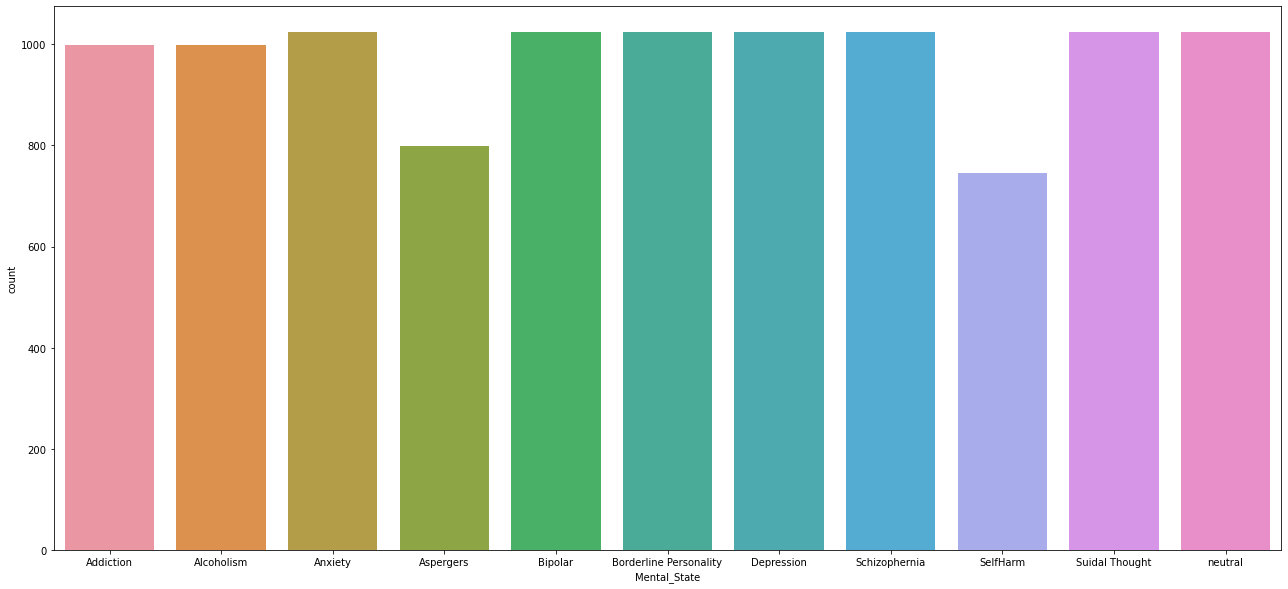

In [17]:
plt.subplots(figsize=(22,10))
sns.countplot(df["Mental_State"])
plt.show()

In [18]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

26163


In [19]:
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup

import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer


In [20]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [21]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

26163


In [22]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on description column
df['Description']=df['Description'].apply(denoise_text)

C:\Users\moshi\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [23]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on description column
df['Description']=df['Description'].apply(remove_special_characters)

In [24]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on description column
df['Description']=df['Description'].apply(simple_stemmer)

In [25]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['Description']=df['Description'].apply(remove_stopwords)

{'ours', 'were', 's', "she's", 'theirs', 'out', 'off', 'didn', 'if', "don't", 'or', 'mightn', 'of', 'shan', 'yourself', "weren't", 'those', 'where', 'up', 'him', "shan't", "aren't", "should've", "couldn't", "that'll", 'am', 'each', 'before', 'after', 'as', 'some', 'by', 'other', 'your', 'into', 'yours', 'had', 'it', 'will', 'these', 'was', 'because', 'an', 'his', 'below', 'won', 'are', 'no', 'aren', 'what', 'most', 've', 'hasn', 'me', 'having', 'isn', 'couldn', 'don', 'while', 'its', 'there', "didn't", 'been', 'against', 'any', 'here', 'her', "wasn't", 'itself', 'o', 'from', 'which', 'down', 'can', 'both', 'ma', 'between', "doesn't", 'how', 'does', 'all', 'hadn', 'until', 'just', 'i', 'a', 'about', 'then', 'y', 'ourselves', 'has', 'now', "hadn't", 'through', 'same', 'herself', 'once', 'he', "hasn't", 'my', 'have', 'do', 'and', 'ain', 'this', 'be', 'own', 'that', 'mustn', 'for', 'the', 'our', 'she', 'too', 'm', 'in', 're', 'with', 'during', "you'll", 'myself', 'but', 'why', 'very', 't',

In [26]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

15023


In [27]:
text = df["Description"]

In [28]:
train_counts = count_vect.fit_transform(text) # converting docs into vectors
train_tfidf  = train_counts 
train_tfidf = tfidf_transformer.fit_transform(train_counts) # converting transformed vectors into tf-idf vectors
train_tfidf.shape

(10710, 20520)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, df['Mental_State_label'], test_size=0.2, random_state=42)

Y_pre = df['Mental_State']
target_names = list(set(Y_pre))

In [31]:
target_names

['Aspergers',
 'Alcoholism',
 'Suidal Thought',
 'Borderline Personality',
 'Schizophernia',
 'SelfHarm',
 'neutral',
 'Anxiety',
 'Bipolar',
 'Depression',
 'Addiction']

In [32]:
X_train

<8568x20520 sparse matrix of type '<class 'numpy.float64'>'
	with 474347 stored elements in Compressed Sparse Row format>

In [33]:
y_train

4098      4
2517      2
3564      3
2691      2
10853    10
         ..
6099      5
5556      5
5755      5
860       0
8016      7
Name: Mental_State_label, Length: 8568, dtype: int32

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV 

In [35]:
import seaborn as sn

# Naive Bayes

In [36]:
from sklearn.naive_bayes import MultinomialNB

Test set accuracy 0.5826330532212886
                        precision    recall  f1-score   support

             Aspergers       0.70      0.80      0.75       205
            Alcoholism       0.71      0.81      0.76       196
        Suidal Thought       0.53      0.65      0.58       189
Borderline Personality       0.97      0.22      0.36       153
         Schizophernia       0.71      0.65      0.68       220
              SelfHarm       0.45      0.74      0.56       215
               neutral       0.36      0.52      0.43       206
               Anxiety       0.71      0.66      0.69       197
               Bipolar       0.98      0.26      0.41       159
            Depression       0.48      0.69      0.57       197
             Addiction       1.00      0.25      0.40       205

              accuracy                           0.58      2142
             macro avg       0.69      0.57      0.56      2142
          weighted avg       0.68      0.58      0.57      2142



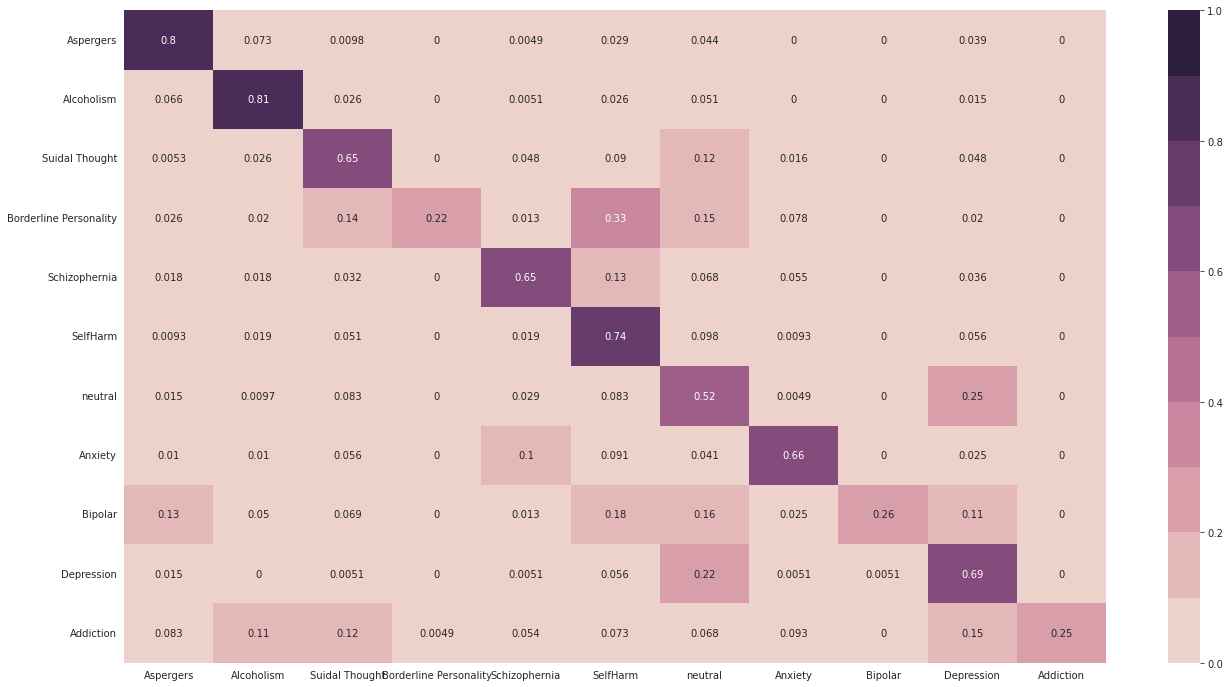

In [37]:
NBclassifer = MultinomialNB()
NBclassifer.fit(X_train, y_train)
y_pred = NBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)


# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [38]:
NBclassifer.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [39]:
#Random Search

In [40]:
NBRclassifer = MultinomialNB()

In [41]:
param_NBR = {"alpha": [0.5,0.4,0.3,0.2,0.1,1.0, 2.0, 3.0, 4.0,5.0]}

In [42]:
NBRrandom_search = RandomizedSearchCV(NBRclassifer, param_NBR , cv=5, verbose=1, n_jobs=-1, n_iter=10,return_train_score=True)
NBRrandom_search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [43]:
NBRrandom_search.cv_results_

{'mean_fit_time': array([0.02010403, 0.02260032, 0.02511377, 0.02249899, 0.02519999,
        0.02681184, 0.02772121, 0.02540355, 0.02710252, 0.02450228]),
 'std_fit_time': array([0.00193047, 0.00146428, 0.00281644, 0.00260786, 0.00372243,
        0.0027103 , 0.00452505, 0.00145866, 0.00257863, 0.00266606]),
 'mean_score_time': array([0.00410175, 0.00380163, 0.00450473, 0.00330048, 0.0045012 ,
        0.00571017, 0.00409975, 0.00420017, 0.00350022, 0.00290194]),
 'std_score_time': array([0.00058072, 0.0005996 , 0.00063839, 0.00039926, 0.00099941,
        0.00133177, 0.00086025, 0.00067899, 0.00045041, 0.00079981]),
 'param_alpha': masked_array(data=[0.5, 0.4, 0.3, 0.2, 0.1, 1.0, 2.0, 3.0, 4.0, 5.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.5},
  {'alpha': 0.4},
  {'alpha': 0.3},
  {'alpha': 0.2},
  {'alpha': 0.1},
  {'alpha': 1.0},
  {'alpha':

Test set accuracy 0.6311858076563959
                        precision    recall  f1-score   support

             Aspergers       0.73      0.80      0.76       205
            Alcoholism       0.74      0.82      0.78       196
        Suidal Thought       0.61      0.59      0.60       189
Borderline Personality       0.80      0.52      0.63       153
         Schizophernia       0.66      0.63      0.64       220
              SelfHarm       0.52      0.69      0.59       215
               neutral       0.38      0.49      0.43       206
               Anxiety       0.67      0.70      0.68       197
               Bipolar       0.90      0.56      0.69       159
            Depression       0.49      0.65      0.56       197
             Addiction       0.98      0.47      0.63       205

              accuracy                           0.63      2142
             macro avg       0.68      0.63      0.64      2142
          weighted avg       0.67      0.63      0.63      2142



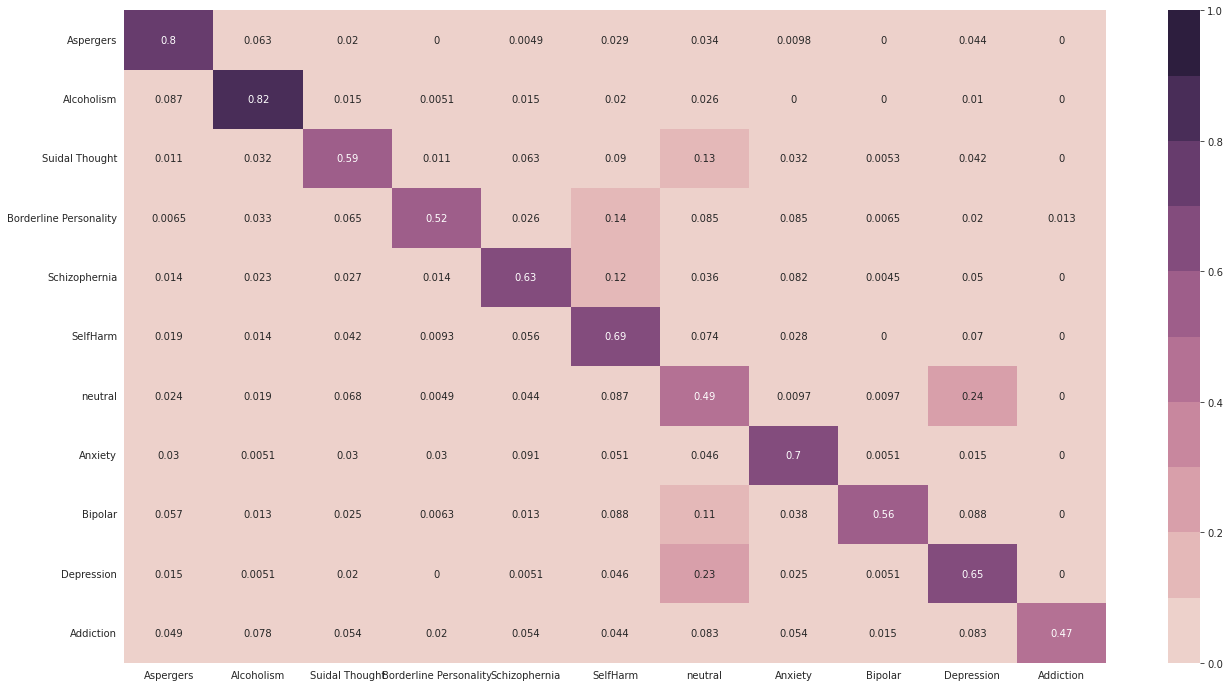

In [44]:
y_pred = NBRrandom_search.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)



# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [45]:
NBRrandom_search.best_params_

{'alpha': 0.1}

# Support Vector Machine

In [46]:
from sklearn.svm import SVC


Test set accuracy 0.6970121381886087
                        precision    recall  f1-score   support

             Aspergers       0.81      0.74      0.77       205
            Alcoholism       0.83      0.82      0.82       196
        Suidal Thought       0.76      0.69      0.73       189
Borderline Personality       0.74      0.64      0.69       153
         Schizophernia       0.76      0.65      0.70       220
              SelfHarm       0.69      0.66      0.67       215
               neutral       0.47      0.54      0.50       206
               Anxiety       0.73      0.69      0.70       197
               Bipolar       0.89      0.68      0.77       159
            Depression       0.55      0.58      0.57       197
             Addiction       0.63      0.98      0.77       205

              accuracy                           0.70      2142
             macro avg       0.72      0.70      0.70      2142
          weighted avg       0.71      0.70      0.70      2142



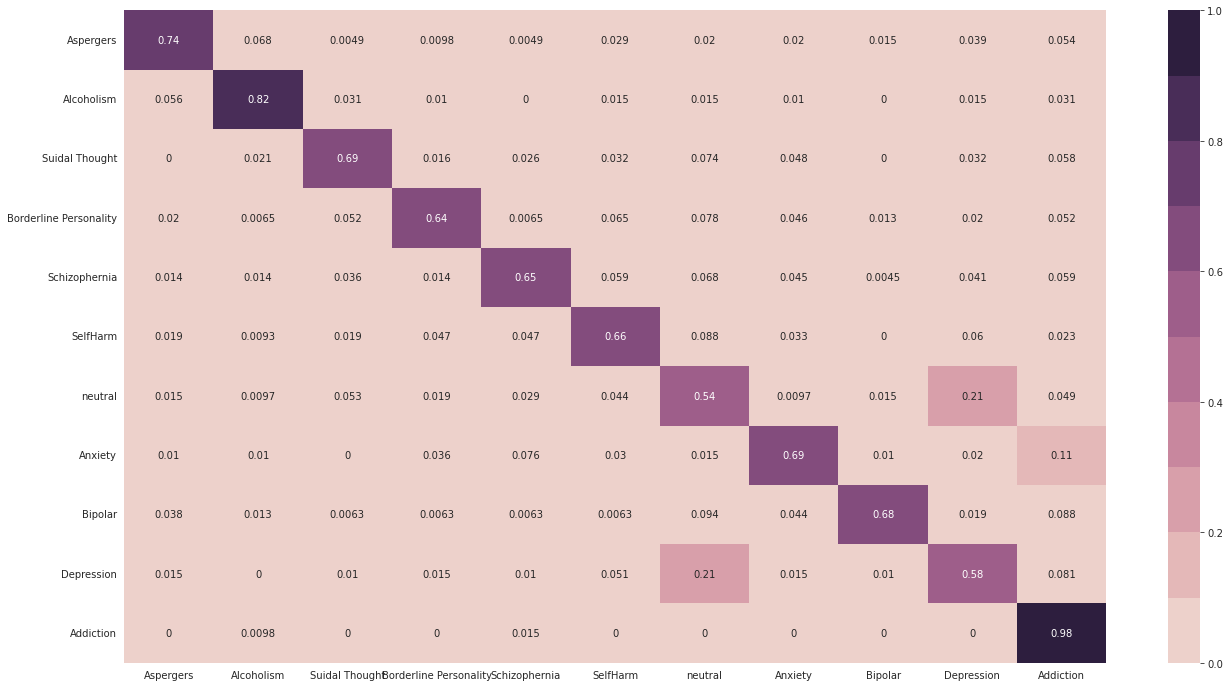

In [47]:
SVMclassifer = SVC()
SVMclassifer.fit(X_train, y_train)
y_pred = SVMclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [48]:
SVMclassifer.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [49]:
#Random Search

In [50]:
SVMRclassifer = SVC()

In [51]:
param_SVM = {
    "C": [0.1,0.2,0.3,0.4,0.5,1.0,3.0,5.0,10,100],
    "tol": [ 0.0, 0.001, 0.01 , 0.1 ]
}

In [52]:
SVMRrandom_search = RandomizedSearchCV(SVMRclassifer, param_SVM, cv=5, verbose=1, n_jobs=-1, n_iter=10,return_train_score=True)
SVMRrandom_search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\moshi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\moshi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\moshi\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\moshi\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 374, in _sparse_fit
    ) = libsvm_sparse.libsvm_sparse_train(
  File "s

In [53]:
SVMRrandom_search.cv_results_

{'mean_fit_time': array([3.08071815e+01, 3.88921304e+01, 3.56379815e+01, 3.39647341e+01,
        3.08550256e+01, 3.56344488e+01, 3.90191796e+01, 2.43078232e-02,
        2.31054306e-02, 2.89834402e+01]),
 'std_fit_time': array([1.74929875e-01, 2.72688348e-01, 2.11347708e-01, 2.32141122e-01,
        1.55838931e-01, 2.16021739e-01, 1.40376791e-01, 1.32468362e-03,
        6.62620015e-04, 3.42546845e+00]),
 'mean_score_time': array([5.58555708, 5.9101799 , 5.99053903, 5.9902813 , 5.7927412 ,
        5.95520539, 5.93646712, 0.        , 0.        , 4.31203156]),
 'std_score_time': array([0.03941997, 0.02321314, 0.02823844, 0.13477336, 0.15100753,
        0.02735672, 0.04895401, 0.        , 0.        , 0.76794453]),
 'param_tol': masked_array(data=[0.1, 0.001, 0.001, 0.01, 0.1, 0.01, 0.001, 0.0, 0.0,
                    0.01],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'para

Test set accuracy 0.7082166199813259
                        precision    recall  f1-score   support

             Aspergers       0.82      0.77      0.80       205
            Alcoholism       0.84      0.83      0.83       196
        Suidal Thought       0.73      0.70      0.71       189
Borderline Personality       0.77      0.64      0.70       153
         Schizophernia       0.75      0.68      0.71       220
              SelfHarm       0.70      0.68      0.69       215
               neutral       0.48      0.53      0.51       206
               Anxiety       0.75      0.71      0.73       197
               Bipolar       0.88      0.70      0.78       159
            Depression       0.56      0.57      0.57       197
             Addiction       0.66      0.96      0.78       205

              accuracy                           0.71      2142
             macro avg       0.72      0.71      0.71      2142
          weighted avg       0.72      0.71      0.71      2142



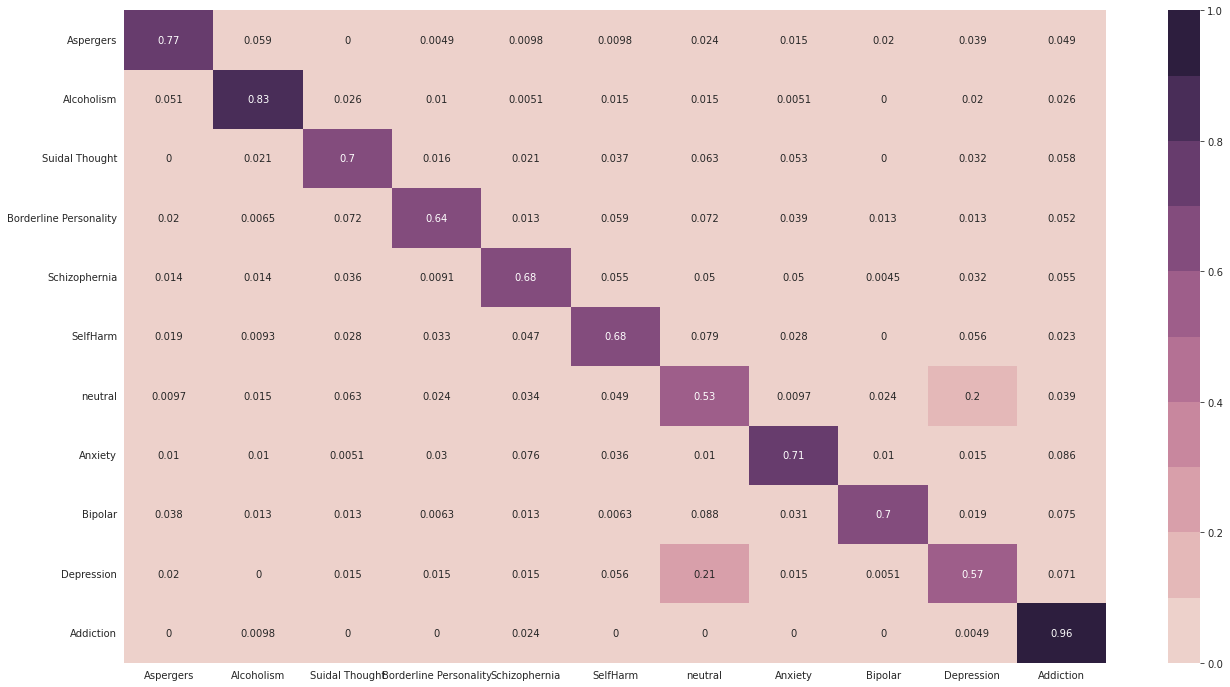

In [54]:
y_pred = SVMRrandom_search.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [55]:
SVMRrandom_search.best_params_

{'tol': 0.1, 'C': 5.0}

# XGBoost

In [56]:
from xgboost import XGBClassifier

Test set accuracy 0.7110177404295052
                        precision    recall  f1-score   support

             Aspergers       0.82      0.73      0.77       205
            Alcoholism       0.79      0.88      0.83       196
        Suidal Thought       0.72      0.71      0.71       189
Borderline Personality       0.77      0.69      0.72       153
         Schizophernia       0.78      0.71      0.74       220
              SelfHarm       0.77      0.67      0.72       215
               neutral       0.44      0.49      0.47       206
               Anxiety       0.76      0.75      0.76       197
               Bipolar       0.80      0.72      0.76       159
            Depression       0.49      0.51      0.50       197
             Addiction       0.78      0.96      0.86       205

              accuracy                           0.71      2142
             macro avg       0.72      0.71      0.71      2142
          weighted avg       0.72      0.71      0.71      2142



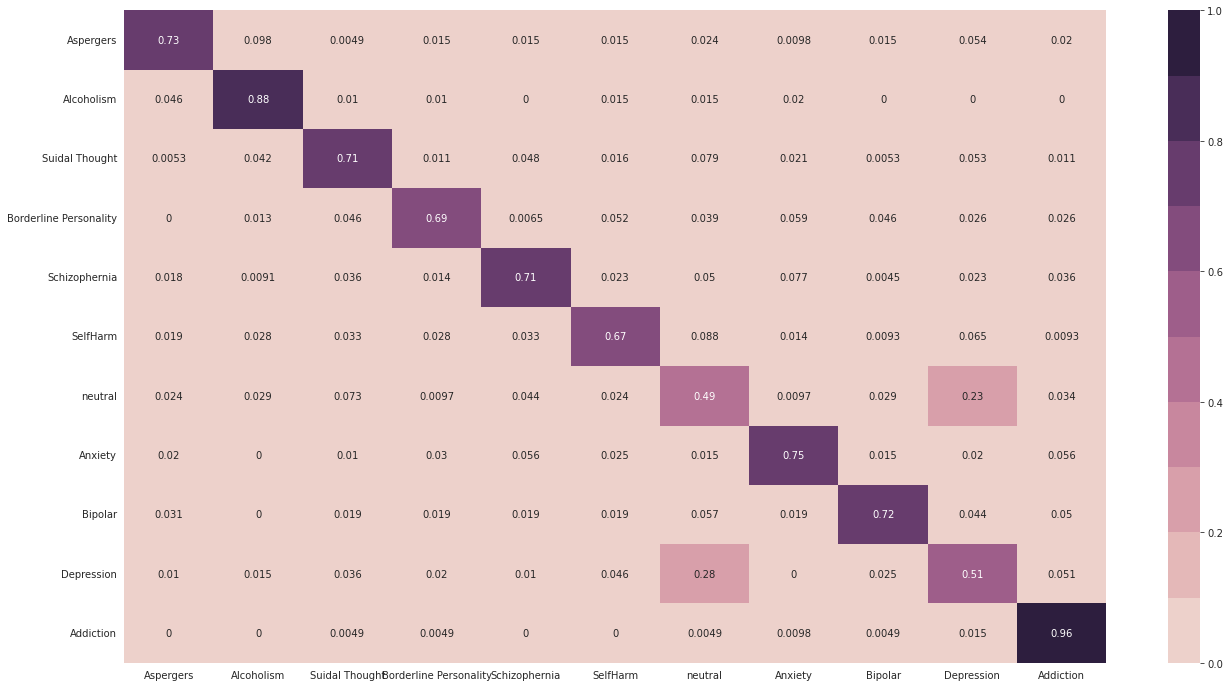

In [57]:
XGBclassifer = XGBClassifier()
XGBclassifer.fit(X_train, y_train)
y_pred = XGBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


In [58]:
XGBclassifer.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)>

In [59]:
#random search

In [60]:
XGBRclassifer = XGBClassifier()

In [61]:
params_XGB = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30,0.35],
 "max_depth" : [3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [1, 3, 5, 7],
 "gamma": [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.2,0.3, 0.5,1.0],
 "n_estimators" : [ 20,40, 60, 80, 100,150,200]
}

In [62]:
XGBRrandom_search = RandomizedSearchCV(XGBRclassifer, params_XGB, cv=5, verbose=1, n_jobs=-1, n_iter=10, return_train_score=True)
XGBRrandom_search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [63]:
XGBRrandom_search.cv_results_

{'mean_fit_time': array([ 86.52407589,  31.61489305,  34.07373195,  36.08451662,
         19.95846291,  95.4192574 , 126.57057223,  66.51019592,
         13.97536712, 113.97452912]),
 'std_fit_time': array([0.95781255, 0.46810275, 0.37259056, 0.3716645 , 0.19463592,
        1.61241234, 0.86065265, 1.81097283, 0.10099437, 3.10246118]),
 'mean_score_time': array([0.09001803, 0.04510937, 0.12631707, 0.09101343, 0.06010962,
        0.08291106, 0.08741775, 0.1103158 , 0.03921475, 0.08651004]),
 'std_score_time': array([0.01177875, 0.00066412, 0.00193861, 0.00104702, 0.00300605,
        0.00165524, 0.00249964, 0.00742163, 0.00149842, 0.00322509]),
 'param_n_estimators': masked_array(data=[100, 20, 80, 40, 60, 100, 40, 80, 40, 40],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[7, 7, 5, 5, 1, 5, 1, 7, 1, 3],
              mask=[False

Test set accuracy 0.7156862745098039
                        precision    recall  f1-score   support

             Aspergers       0.82      0.78      0.80       205
            Alcoholism       0.82      0.89      0.85       196
        Suidal Thought       0.70      0.71      0.71       189
Borderline Personality       0.82      0.65      0.73       153
         Schizophernia       0.81      0.70      0.75       220
              SelfHarm       0.75      0.67      0.71       215
               neutral       0.48      0.50      0.49       206
               Anxiety       0.75      0.72      0.74       197
               Bipolar       0.84      0.73      0.78       159
            Depression       0.52      0.53      0.53       197
             Addiction       0.68      0.99      0.80       205

              accuracy                           0.72      2142
             macro avg       0.73      0.71      0.72      2142
          weighted avg       0.72      0.72      0.71      2142



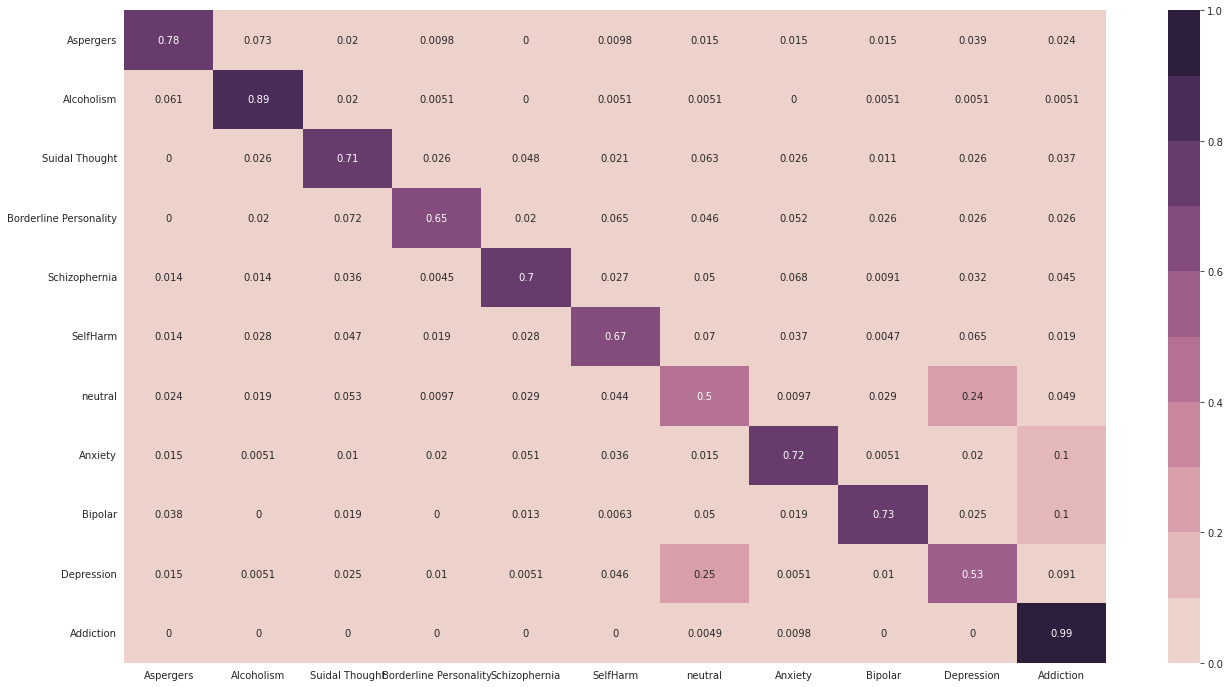

In [64]:
y_pred = XGBRrandom_search.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [65]:
XGBRrandom_search.best_params_

{'n_estimators': 80,
 'min_child_weight': 5,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.2}

# AdaBoost

In [66]:
from sklearn.ensemble import AdaBoostClassifier


Test set accuracy 0.6120448179271709
                        precision    recall  f1-score   support

             Aspergers       0.74      0.65      0.69       205
            Alcoholism       0.76      0.80      0.78       196
        Suidal Thought       0.62      0.64      0.63       189
Borderline Personality       0.69      0.50      0.58       153
         Schizophernia       0.82      0.60      0.70       220
              SelfHarm       0.61      0.59      0.60       215
               neutral       0.38      0.41      0.39       206
               Anxiety       0.60      0.63      0.62       197
               Bipolar       0.70      0.61      0.65       159
            Depression       0.35      0.50      0.41       197
             Addiction       0.68      0.79      0.73       205

              accuracy                           0.61      2142
             macro avg       0.63      0.61      0.62      2142
          weighted avg       0.63      0.61      0.62      2142



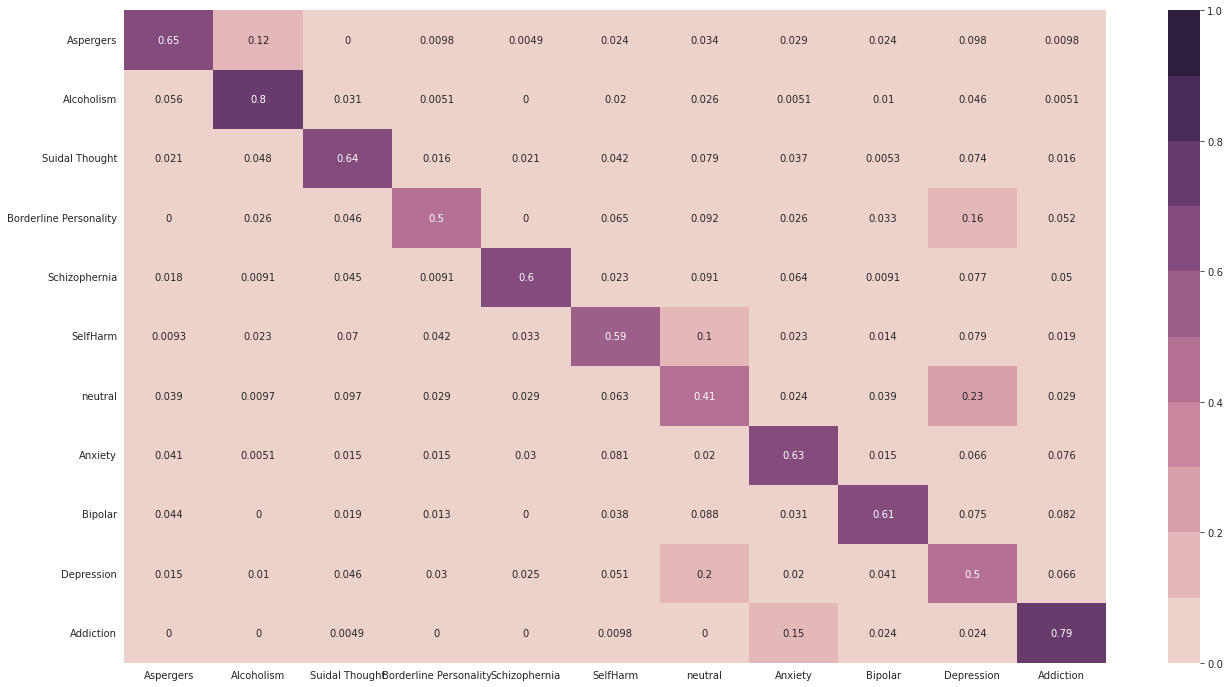

In [67]:
ADBclassifer = AdaBoostClassifier(n_estimators=60,
                         learning_rate=1)
ADBclassifer.fit(X_train, y_train)
y_pred = ADBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  


In [68]:
ADBclassifer.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1,
 'n_estimators': 60,
 'random_state': None}

In [69]:
#random search

In [70]:
ADBRclassifer = AdaBoostClassifier()

In [71]:
params_ADB = {
 "learning_rate" : [0.1,0.5,1.0,1.5,2.0],
 "n_estimators" : [ 20,40, 60, 80, 100,150,200]
}

In [72]:
ADBRrandom_search = RandomizedSearchCV(ADBRclassifer, params_ADB, cv=5, verbose=1, n_jobs=-1, n_iter=10, return_train_score=True)
ADBRrandom_search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [73]:
ADBRrandom_search.cv_results_

{'mean_fit_time': array([ 7.67438207, 38.48976402, 19.18117919, 11.53792906, 11.59300375,
        28.91972837, 15.31428723, 19.21406012, 18.7953887 , 10.89386492]),
 'std_fit_time': array([0.03283425, 0.14564854, 0.08660873, 0.04188634, 0.05498982,
        0.09315881, 0.06111417, 0.09407012, 0.355285  , 0.64727661]),
 'mean_score_time': array([0.04541535, 0.20894809, 0.10252237, 0.06361041, 0.06882262,
        0.15022888, 0.08501725, 0.10181904, 0.08791533, 0.05080504]),
 'std_score_time': array([0.00271332, 0.00913837, 0.00209463, 0.00257799, 0.00729138,
        0.00336701, 0.00534241, 0.00413685, 0.01596907, 0.00889263]),
 'param_n_estimators': masked_array(data=[40, 200, 100, 60, 60, 150, 80, 100, 100, 60],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[1.5, 0.5, 2.0, 0.1, 1.5, 0.5, 1.5, 0.5, 1.5, 0.5],
              mask=[Fal

Test set accuracy 0.6288515406162465
                        precision    recall  f1-score   support

             Aspergers       0.77      0.61      0.68       205
            Alcoholism       0.76      0.80      0.78       196
        Suidal Thought       0.65      0.66      0.65       189
Borderline Personality       0.94      0.47      0.63       153
         Schizophernia       0.84      0.57      0.68       220
              SelfHarm       0.73      0.55      0.63       215
               neutral       0.36      0.49      0.42       206
               Anxiety       0.78      0.62      0.69       197
               Bipolar       0.77      0.59      0.67       159
            Depression       0.35      0.57      0.44       197
             Addiction       0.62      0.95      0.75       205

              accuracy                           0.63      2142
             macro avg       0.69      0.63      0.64      2142
          weighted avg       0.68      0.63      0.64      2142



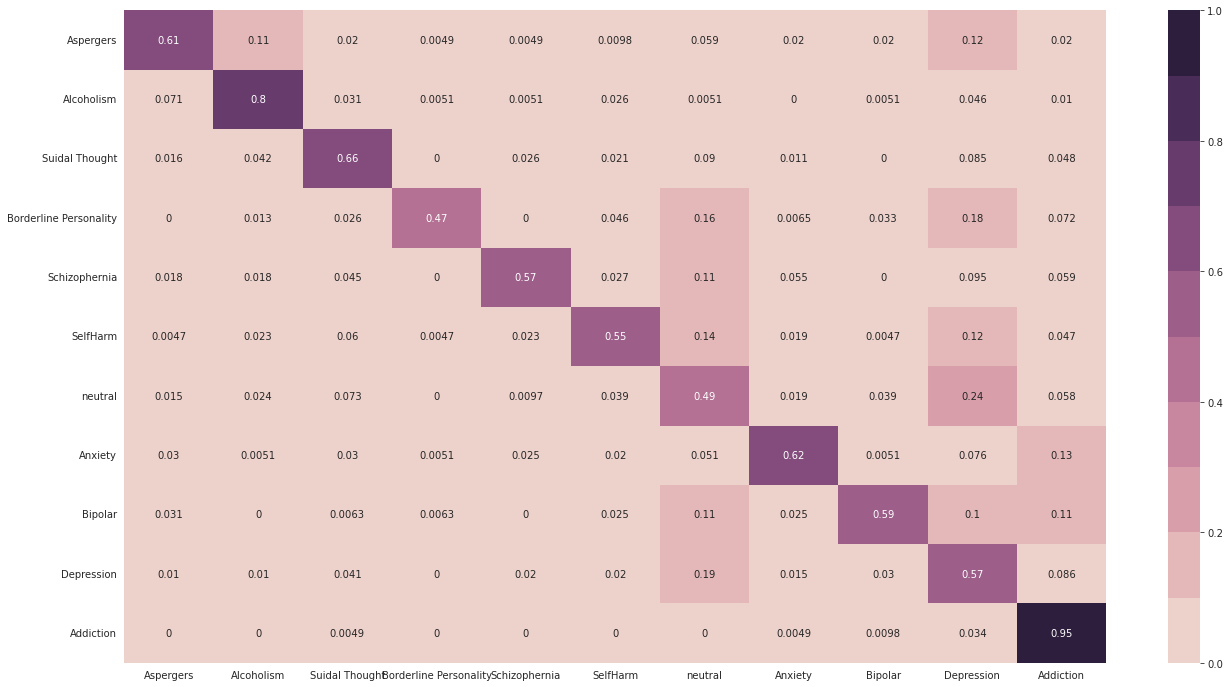

In [74]:
y_pred = ADBRrandom_search.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [75]:
ADBRrandom_search.best_params_

{'n_estimators': 60, 'learning_rate': 0.5}

# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

Test set accuracy 0.6619981325863679
                        precision    recall  f1-score   support

             Aspergers       0.76      0.70      0.73       205
            Alcoholism       0.76      0.85      0.80       196
        Suidal Thought       0.58      0.66      0.62       189
Borderline Personality       0.84      0.50      0.63       153
         Schizophernia       0.77      0.68      0.72       220
              SelfHarm       0.80      0.63      0.70       215
               neutral       0.48      0.40      0.43       206
               Anxiety       0.78      0.65      0.71       197
               Bipolar       0.73      0.60      0.66       159
            Depression       0.48      0.55      0.52       197
             Addiction       0.56      1.00      0.72       205

              accuracy                           0.66      2142
             macro avg       0.68      0.66      0.66      2142
          weighted avg       0.68      0.66      0.66      2142



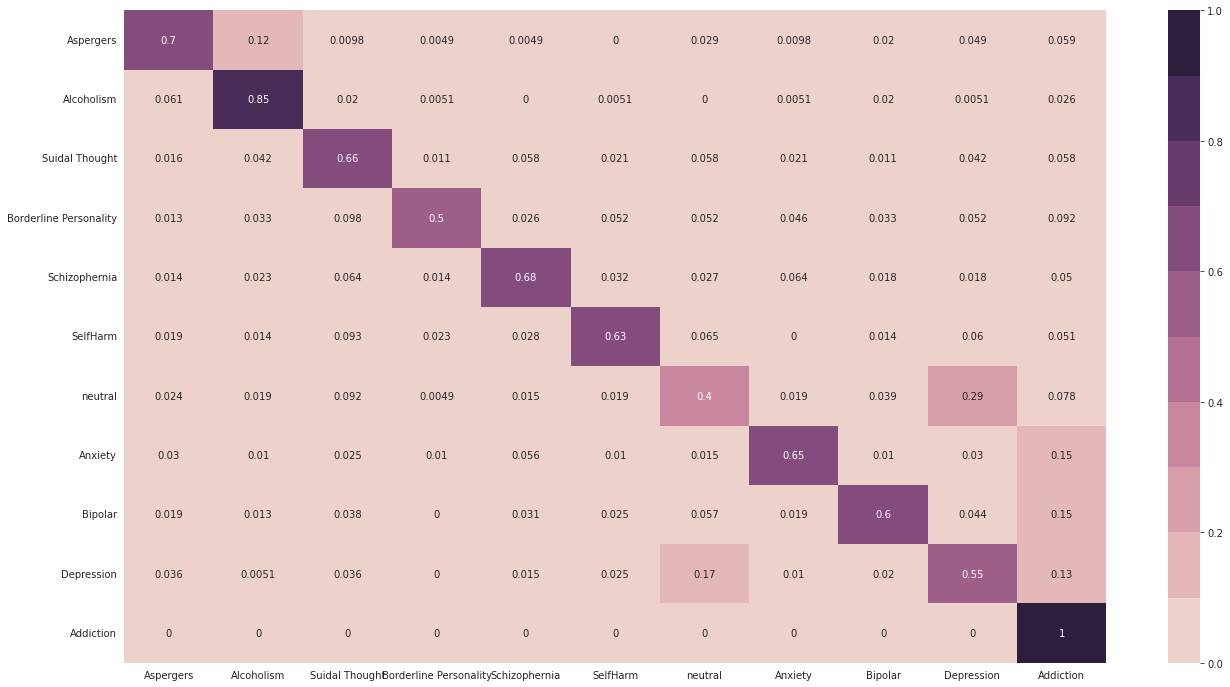

In [77]:
RFclassifer = RandomForestClassifier()
shapas = RFclassifer.fit(X_train, y_train)
y_pred = RFclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [78]:
RFclassifer.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [79]:
random_RF = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2,3,4,5,6,7,8,9,10],
               'min_samples_split': [2, 5,8, 10,15],
               'n_estimators': [50,100,150, 200, 250]}

In [80]:
RFRclassifer = RandomForestClassifier()

In [81]:
RFRrandom_search = RandomizedSearchCV(RFRclassifer, random_RF, cv=5, verbose=1, n_jobs=-1, n_iter=10, return_train_score=True)
RFRrandom_search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\moshi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [82]:
RFRrandom_search.cv_results_

{'mean_fit_time': array([ 4.82998514, 28.2056385 ,  9.55602899,  4.9271534 ,  4.53435245,
         2.25227609,  3.41834888, 11.7288496 ,  7.13547029,  1.41474347]),
 'std_fit_time': array([0.04619271, 0.10796038, 0.04594508, 0.02993264, 0.06484124,
        0.01407216, 0.01802035, 0.25397362, 0.39491794, 0.05808372]),
 'mean_score_time': array([0.09201436, 0.21054707, 0.14932504, 0.11231556, 0.05851398,
        0.05830917, 0.07040911, 0.12403812, 0.12222247, 0.02960262]),
 'std_score_time': array([0.00567684, 0.00741863, 0.00246442, 0.00775834, 0.00258695,
        0.00996872, 0.00162606, 0.00594639, 0.01034667, 0.00339651]),
 'param_n_estimators': masked_array(data=[150, 250, 250, 200, 100, 100, 150, 250, 250, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[8, 5, 2, 15, 8, 2, 15, 8, 8, 15],
              mask=[False, False

Test set accuracy 0.7026143790849673
                        precision    recall  f1-score   support

             Aspergers       0.81      0.76      0.78       205
            Alcoholism       0.78      0.90      0.84       196
        Suidal Thought       0.67      0.73      0.70       189
Borderline Personality       0.94      0.56      0.70       153
         Schizophernia       0.81      0.71      0.76       220
              SelfHarm       0.80      0.64      0.71       215
               neutral       0.51      0.43      0.47       206
               Anxiety       0.77      0.70      0.73       197
               Bipolar       0.89      0.69      0.77       159
            Depression       0.52      0.58      0.55       197
             Addiction       0.56      1.00      0.72       205

              accuracy                           0.70      2142
             macro avg       0.73      0.70      0.70      2142
          weighted avg       0.73      0.70      0.70      2142



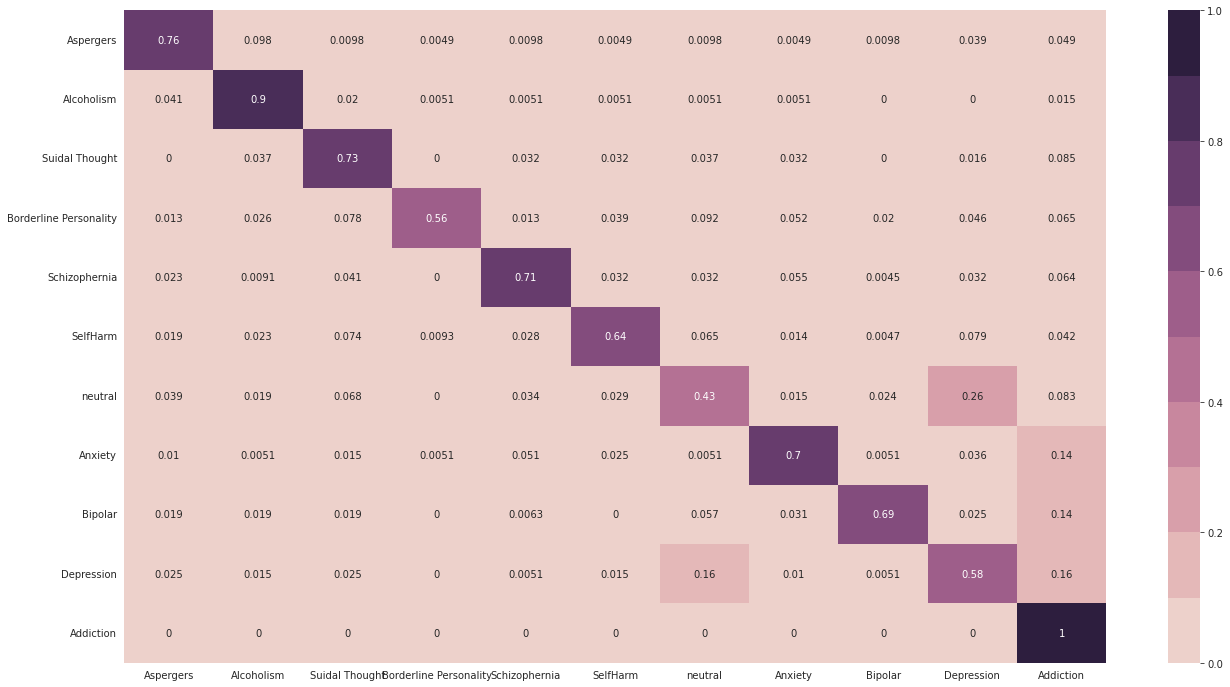

In [83]:
y_pred = RFRrandom_search.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [84]:
RFRrandom_search.best_params_

{'n_estimators': 250,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

# SGD

In [85]:
from sklearn.linear_model import SGDClassifier

Test set accuracy 0.7301587301587301
                        precision    recall  f1-score   support

             Aspergers       0.76      0.79      0.78       205
            Alcoholism       0.79      0.87      0.83       196
        Suidal Thought       0.73      0.74      0.73       189
Borderline Personality       0.75      0.73      0.74       153
         Schizophernia       0.83      0.69      0.75       220
              SelfHarm       0.75      0.69      0.72       215
               neutral       0.53      0.46      0.49       206
               Anxiety       0.77      0.76      0.77       197
               Bipolar       0.77      0.76      0.77       159
            Depression       0.59      0.59      0.59       197
             Addiction       0.74      0.97      0.84       205

              accuracy                           0.73      2142
             macro avg       0.73      0.73      0.73      2142
          weighted avg       0.73      0.73      0.73      2142



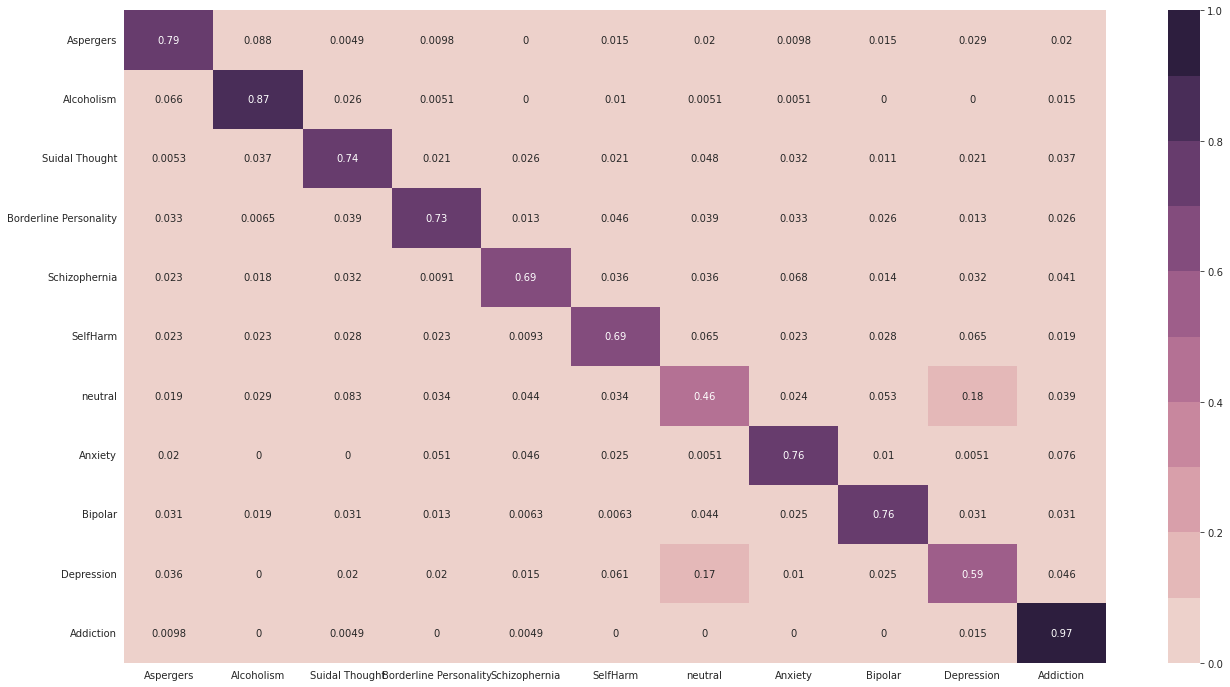

In [86]:
SGDclassifer = SGDClassifier()
SGDclassifer.fit(X_train, y_train)
y_pred = SGDclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #


cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [87]:
SGDclassifer.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [88]:
random_SGD = {'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
               'penalty' : ['l1', 'l2', 'elasticnet'],
               'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive'],
                'eta0':[0.1,0.2,0.3,0.5,1]}



In [89]:
#random search

In [90]:
SGDRclassifer = SGDClassifier()

In [91]:
SGDRrandom_search = RandomizedSearchCV(SGDRclassifer, random_SGD , cv=5, verbose=1, n_jobs=-1, n_iter=10, return_train_score=True)
SGDRrandom_search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [92]:
SGDRrandom_search.cv_results_

{'mean_fit_time': array([2.63829141, 0.44800487, 1.89654078, 1.53752813, 3.99398174,
        0.23155022, 2.33299942, 0.18392925, 2.97546983, 2.61871462]),
 'std_fit_time': array([0.03050369, 0.0106707 , 0.05045117, 0.10340418, 0.08708621,
        0.00832482, 0.03349709, 0.01855046, 0.17847761, 0.15795383]),
 'mean_score_time': array([0.00300088, 0.00399852, 0.00310092, 0.00309749, 0.00250177,
        0.00260029, 0.00250139, 0.00280008, 0.00210028, 0.00159926]),
 'std_score_time': array([3.17487462e-04, 1.30318259e-03, 1.99539196e-04, 2.01016720e-04,
        3.56959672e-06, 3.74457782e-04, 3.17114908e-04, 2.45067701e-04,
        3.74788892e-04, 2.00179931e-04]),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l1', 'l2', 'elasticnet',
                    'elasticnet', 'l2', 'elasticnet', 'l2'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_loss': masked_arr

Test set accuracy 0.6708683473389355
                        precision    recall  f1-score   support

             Aspergers       0.79      0.74      0.77       205
            Alcoholism       0.72      0.77      0.74       196
        Suidal Thought       0.65      0.67      0.66       189
Borderline Personality       0.70      0.62      0.66       153
         Schizophernia       0.74      0.71      0.73       220
              SelfHarm       0.71      0.71      0.71       215
               neutral       0.41      0.38      0.39       206
               Anxiety       0.71      0.74      0.73       197
               Bipolar       0.67      0.66      0.67       159
            Depression       0.53      0.50      0.51       197
             Addiction       0.70      0.87      0.78       205

              accuracy                           0.67      2142
             macro avg       0.67      0.67      0.67      2142
          weighted avg       0.67      0.67      0.67      2142



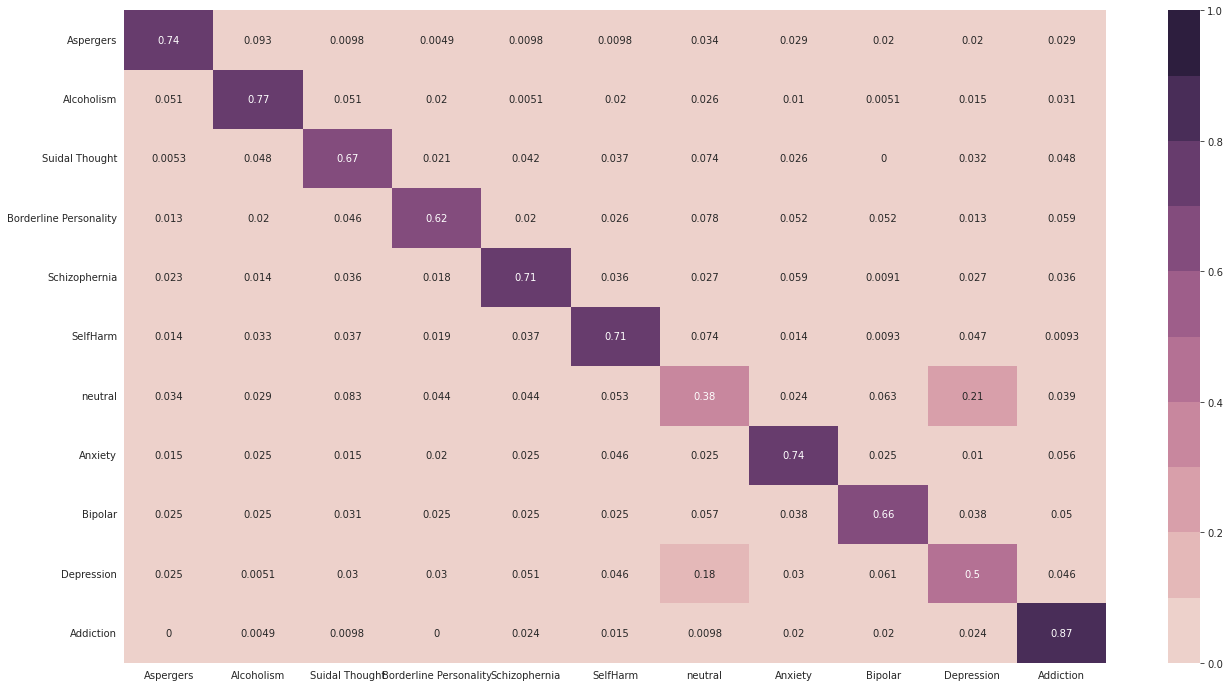

In [93]:
y_pred = SGDRrandom_search.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [94]:
SGDRrandom_search.best_params_

{'penalty': 'elasticnet',
 'loss': 'perceptron',
 'learning_rate': 'adaptive',
 'eta0': 0.1,
 'alpha': 0.0001}

# Logistics Regression

In [95]:
from sklearn.linear_model import LogisticRegression

C:\Users\moshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test set accuracy 0.7133520074696545
                        precision    recall  f1-score   support

             Aspergers       0.82      0.75      0.78       205
            Alcoholism       0.83      0.83      0.83       196
        Suidal Thought       0.77      0.71      0.74       189
Borderline Personality       0.75      0.67      0.71       153
         Schizophernia       0.78      0.69      0.73       220
              SelfHarm       0.74      0.69      0.71       215
               neutral       0.50      0.50      0.50       206
               Anxiety       0.74      0.71      0.73       197
               Bipolar       0.85      0.70      0.77       159
            Depression       0.56      0.61      0.58       197
             Addiction       0.65      0.98      0.78       205

              accuracy                           0.71      2142
             macro avg       0.73      0.71      0.71      2142
          weighted avg       0.72      0.71      0.71      2142



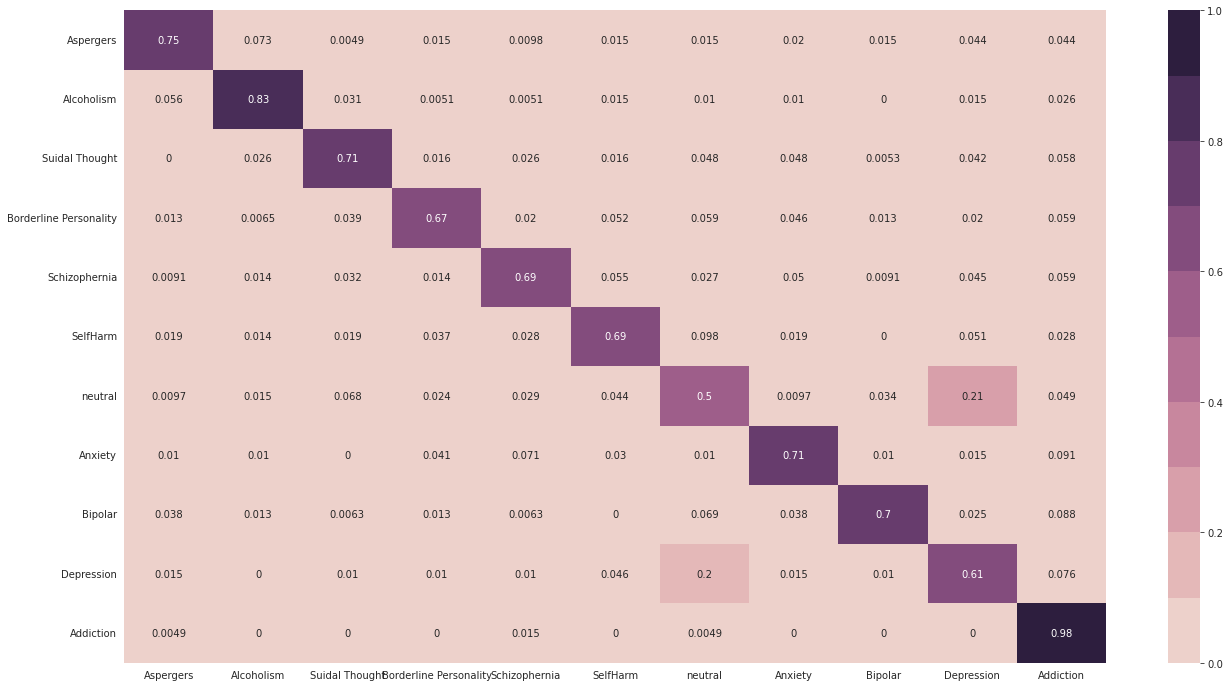

In [96]:
LRclassifer = LogisticRegression()
LRclassifer.fit(X_train, y_train)
y_pred = LRclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [97]:
LRclassifer.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [98]:
param_LR = {
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty' : ['l2'],
    'C'       : [100, 10, 1.0, 0.1, 0.01]
}

In [99]:
#Random Search

In [100]:
LRclassifer = LogisticRegression()

In [101]:
LRRrandom_search = RandomizedSearchCV(LRclassifer, param_LR , cv=5, verbose=1, n_jobs=-1, n_iter=10, return_train_score=True)
LRRrandom_search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [102]:
LRRrandom_search.cv_results_

{'mean_fit_time': array([ 1.50034714,  1.63861918,  3.98733497,  2.43513651, 12.02505083,
        12.80085711,  3.10006652,  5.49674397,  7.38218617,  1.13019609]),
 'std_fit_time': array([0.03221374, 0.03049682, 0.29022433, 0.03145417, 0.65415086,
        0.27148344, 0.1153302 , 0.8404873 , 0.27566614, 0.10944814]),
 'mean_score_time': array([0.00660067, 0.00510249, 0.00701036, 0.00440035, 0.01089845,
        0.00920072, 0.00870676, 0.00500126, 0.00200138, 0.00470548]),
 'std_score_time': array([0.0028534 , 0.00049316, 0.00261467, 0.00132082, 0.00247343,
        0.00243941, 0.00280565, 0.00137853, 0.00089458, 0.00075917]),
 'param_solver': masked_array(data=['lbfgs', 'newton-cg', 'liblinear', 'liblinear',
                    'lbfgs', 'lbfgs', 'liblinear', 'newton-cg',
                    'newton-cg', 'liblinear'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_pe

Test set accuracy 0.7133520074696545
                        precision    recall  f1-score   support

             Aspergers       0.81      0.75      0.78       205
            Alcoholism       0.81      0.84      0.82       196
        Suidal Thought       0.75      0.72      0.74       189
Borderline Personality       0.75      0.68      0.71       153
         Schizophernia       0.79      0.68      0.73       220
              SelfHarm       0.74      0.68      0.71       215
               neutral       0.51      0.48      0.49       206
               Anxiety       0.76      0.72      0.74       197
               Bipolar       0.86      0.72      0.78       159
            Depression       0.55      0.61      0.58       197
             Addiction       0.64      0.98      0.77       205

              accuracy                           0.71      2142
             macro avg       0.73      0.71      0.71      2142
          weighted avg       0.72      0.71      0.71      2142



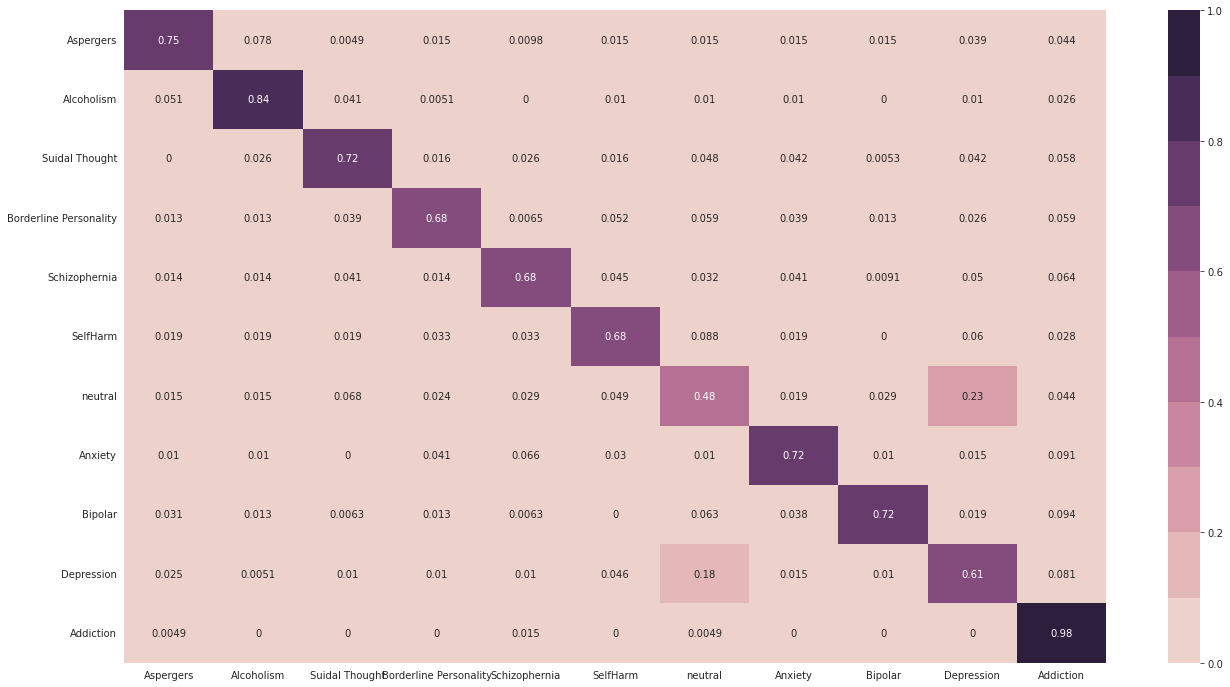

In [103]:
y_pred = LRRrandom_search.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [104]:
LRRrandom_search.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}

In [105]:
#LIME

In [106]:
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

In [107]:

idx = df.index[10]

c = make_pipeline(count_vect, RFclassifer)
class_names = ['Addiction','Alcoholism','Anxiety','Aspergers','Bipolar','Borderline Personality', 'Depression', 'Schizophernia', 'SelfHarm', 'Suidal Thought', 'neutral']
explainer = LimeTextExplainer(class_names = class_names)
exp = explainer.explain_instance(df.Description[idx], c.predict_proba, num_features = 10)



In [108]:
df.Description[10]

'start alcohol ha decad one substanc need thi energi need thi depress kid seen measur kratom phenibut year alway said wa energi supplement protein shake oooooooookay substanc im introvert anymor im shi insecur anxiou im outgo talk creativ thing make even better mother tell becaus ive never clean longer coupl week everyth 8 year even know rememb creativ kid 123 know dont need drug person never make withdraw paw good enough mother go back find anoth legal drug 0 help go treatment none ive sick mani time week 2 end theyv basic fend themselv cant happen ever thi last habit cost 20k panic pay lunch money school go pay 50 pop energi motiv pop last hand pill thought wa discreet 8 year old backseat car color mommi whi take mani pill dont need mommi right stop drink 5th vodka day 5 year ago drinkunknowingli thought social kid sport game drove home trash call onli person knew hyster tri give direct polic came becaus wa someon front lawn fought three peopl infront kid woke next morn bed clueless 

In [109]:
exp.show_in_notebook(text = True)